In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score, mean_absolute_error 

In [2]:
cd C:\Users\Yamini\Desktop\FT\Python projects\Python Linear Regression Project 1_Employee Salary Analysis

C:\Users\Yamini\Desktop\FT\Python projects\Python Linear Regression Project 1_Employee Salary Analysis


In [4]:
data = pd.read_csv("Python_Linear_Regres.csv")
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [6]:
data.experience = data.experience.fillna(0)
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [14]:
import math
mean_test_score = math.floor(data['test_score(out of 10)'].mean())
mean_test_score

7

In [21]:
data['test_score(out of 10)']=data['test_score(out of 10)'].fillna(mean_test_score)
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,7.0,7,72000
7,eleven,7.0,8,80000


In [28]:
new_data = data.replace(['five','two','seven','three','ten','eleven'], [5,2,7,3,10,11])
new_data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


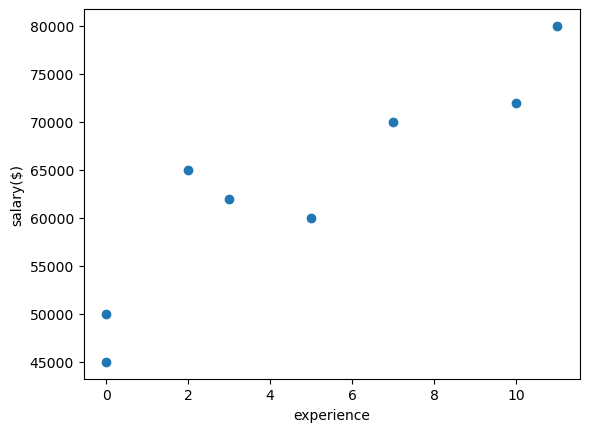

In [30]:
plt.scatter(x = new_data["experience"], y = new_data["salary($)"])

plt.xlabel("experience")
plt.ylabel("salary($)")
plt.show()

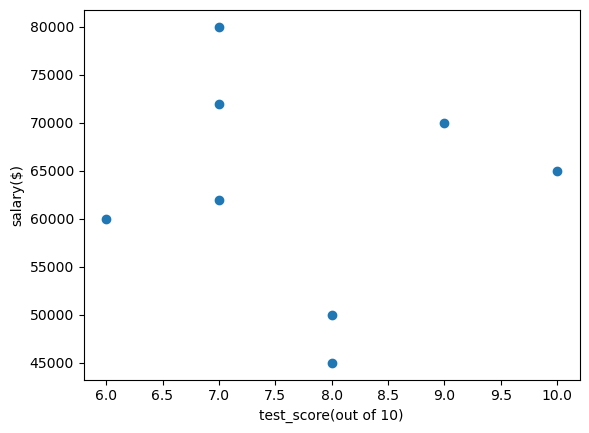

In [26]:
plt.scatter(x = data["test_score(out of 10)"], y = data["salary($)"])

plt.xlabel("test_score(out of 10)")
plt.ylabel("salary($)")
plt.show()

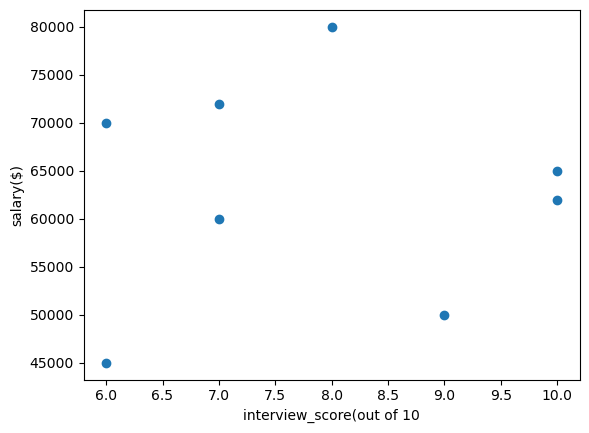

In [27]:
plt.scatter(x = data["interview_score(out of 10)"], y = data["salary($)"])

plt.xlabel("interview_score(out of 10")
plt.ylabel("salary($)")
plt.show()

In [ ]:
plt.bar(tips['sex'], tips['tip'], color = 'green')
plt.xlabel('sex')
plt.ylabel('tip')
plt.show()

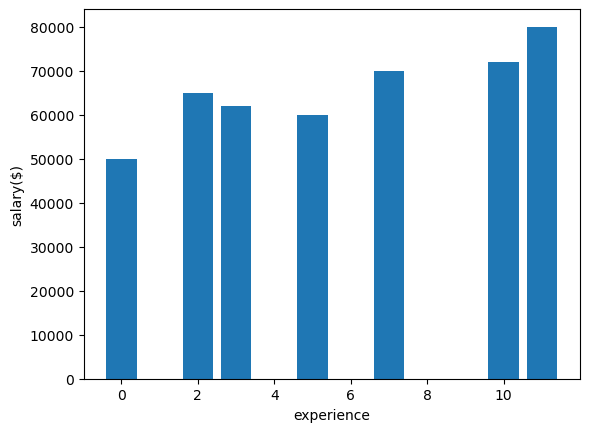

In [31]:
plt.bar(new_data["experience"], new_data["salary($)"])
plt.xlabel("experience")
plt.ylabel("salary($)")
plt.show()

In [32]:
new_data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [35]:
salary = new_data['salary($)']
salary

0    50000
1    45000
2    60000
3    65000
4    70000
5    62000
6    72000
7    80000
Name: salary($), dtype: int64

In [37]:
inde_data = new_data.drop("salary($)", axis = 'columns')
inde_data

,experience,test_score(out of 10),interview_score(out of 10)
0,0,8.0,9
1,0,8.0,6
2,5,6.0,7
3,2,10.0,10
4,7,9.0,6
5,3,7.0,10
6,10,7.0,7
7,11,7.0,8


In [34]:
regression_model = LinearRegression() 

In [42]:
regression_model.fit(new_data[['experience','test_score(out of 10)','interview_score(out of 10)']], new_data[['salary($)']]) 

LinearRegression()

In [43]:
salary_predicted = regression_model.predict([[2,5,7]])
salary_predicted

C:\Users\Yamini\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[46976.11293925]])

In [48]:
import warnings

In [49]:
warnings.filterwarnings('ignore')

In [50]:
salary_prediction1 = regression_model.predict([[5,7,7]])
salary_prediction1

array([[60185.53818349]])

In [51]:
salary_prediction2 = regression_model.predict([[11,7,8]])
salary_prediction2

array([[79866.63483999]])

In [53]:
salary_prediction = regression_model.predict(inde_data)
salary_prediction

array([[52090.46734071],
       [45648.01964161],
       [57964.2290839 ],
       [64525.1061363 ],
       [68325.21184635],
       [60783.44785255],
       [74796.8832586 ],
       [79866.63483999]])

In [55]:
r2=r2_score(salary,salary_prediction)
r2

0.9770139014273139

In [54]:
regression_model.score(new_data[['experience','test_score(out of 10)','interview_score(out of 10)']], new_data[['salary($)']]) 

0.9770139014273139

In [56]:
print('Slope:' ,regression_model.coef_) 
print('Intercept:', regression_model.intercept_) 
print('R2 score: ', r2) 

Slope: [[2922.26901502 2221.30909959 2147.48256637]]
Intercept: [14992.65144669]
R2 score:  0.9770139014273139


In [ ]:
Display Mean Squared Error


7) Display Root mean Squared error

In [57]:
print('Root mean squared error: ', rmse)

NameError: name 'rmse' is not defined

In [58]:
mean_absolute_error(salary,salary_prediction)

1383.84256022915